# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

In [2]:
data = pd.read_csv("C:\Saurabh\My phone\datasets\GRE admission/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Feature selection

In [4]:
inputs = data.drop('Chance of Admit ', axis = 1)
targets = data['Chance of Admit ']

In [5]:
from sklearn.feature_selection import f_regression

In [6]:
f_regression(inputs, targets)

(array([7.14626250e-01, 7.20554243e+02, 6.67941156e+02, 4.07467332e+02,
        3.34443726e+02, 3.23996766e+02, 1.27873445e+03, 1.75513976e+02]),
 array([3.98420184e-001, 2.45811241e-091, 3.63410218e-087, 6.63501948e-063,
        1.14109467e-054, 2.00731452e-053, 2.33651400e-126, 1.91817338e-033]))

In [7]:
p_values = f_regression(inputs, targets)[1]

In [8]:
p_values.round(2)

array([0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

The feature 'Serial No.' does not contribute to the model. So we'll be dropping it.

In [9]:
data2 = data.drop('Serial No.', axis = 1)

# EDA

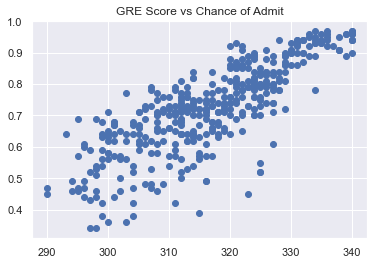

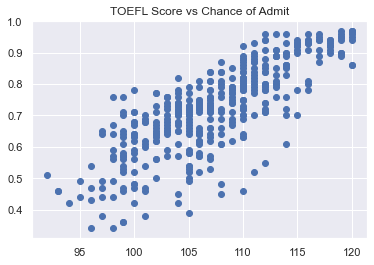

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


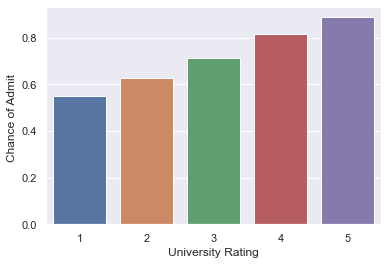

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


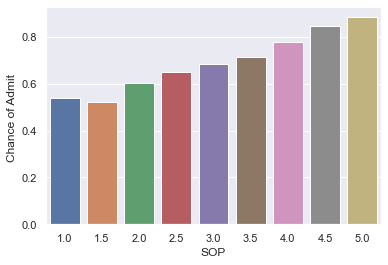

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


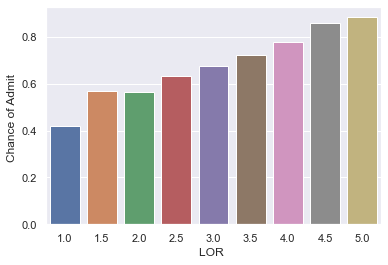

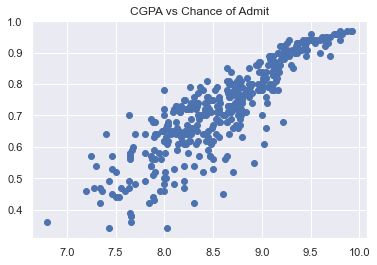

In [10]:
plt.title('GRE Score vs Chance of Admit')
plt.scatter(data['GRE Score'],data['Chance of Admit '])
plt.show()

plt.title('TOEFL Score vs Chance of Admit')
plt.scatter(data['TOEFL Score'],data['Chance of Admit '])
plt.show()


sns.barplot(data['University Rating'],data['Chance of Admit '], ci=None)
plt.show()


sns.barplot(data['SOP'],data['Chance of Admit '], ci=None)
plt.show()


sns.barplot(data['LOR '],data['Chance of Admit '], ci=None)
plt.show()

plt.title('CGPA vs Chance of Admit')
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.show()

Every featuer shows linear relation with 'Chance of Admit'

## Checking multicollinearity

<AxesSubplot:>

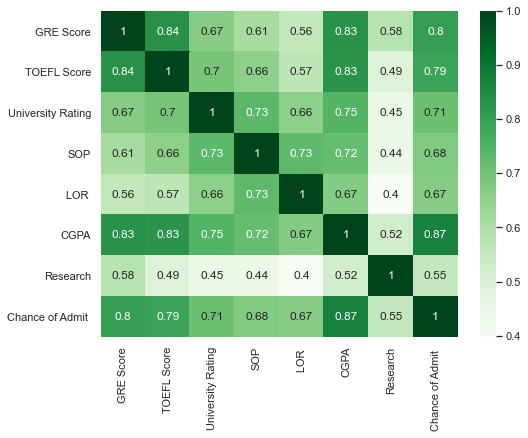

In [11]:
plt.figure(figsize = (8,6))
sns.heatmap(data2.corr(), annot = True, cmap='Greens')

1. The correlation between 'GRE Score', 'TOEFL Score'  and 'CGPA' seems to be more than others.
2. The correlation between 'University score', 'SOP'  and 'CGPA' seems to be more than others.

### Variance inflation factor

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
variables1 = data2[['GRE Score', 'TOEFL Score', 'CGPA']]

In [14]:
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(variables1.values,i) for i in range(variables1.shape[1])]
vif1['features'] = variables1.columns

In [15]:
vif1

,VIF,features
0,994.365812,GRE Score
1,1274.970487,TOEFL Score
2,714.459325,CGPA


As we can see variable 'TOEFL score' shows multicollinearity, So we'll drop it.

In [16]:
variables2 = data2[['University Rating', 'SOP', 'CGPA']]

In [17]:
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif2['features'] = variables2.columns

In [18]:
vif2

,VIF,features
0,18.498702,University Rating
1,29.103861,SOP
2,17.922064,CGPA


As we can see variable 'SOP' shows multicollinearity, So we'll drop it.

In [19]:
df = data2.copy()
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df1 = df.drop(['TOEFL Score', 'SOP'], axis = 1)

In [21]:
df1.head()

,GRE Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,337,4,4.5,9.65,1,0.92
1,324,4,4.5,8.87,1,0.76
2,316,3,3.5,8.00,1,0.72
3,322,3,2.5,8.67,1,0.80
4,314,2,3.0,8.21,0,0.65


In [22]:
df1.shape

(400, 6)

In [23]:
x = df1.drop(['Chance of Admit '], axis = 1)
y = df1['Chance of Admit ']

# Train-test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Classifiers

### Linear regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(x_train, y_train)

LinearRegression()

In [29]:
reg.score(x_train, y_train)

0.8144415934520683

In [30]:
reg.score(x_test, y_test)

0.7370133162536013

### Decision tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dec = DecisionTreeRegressor()

In [33]:
dec.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
dec.score(x_test, y_test)

0.48188746255719483

### Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rnd = RandomForestRegressor()

In [37]:
rnd.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
rnd.score(x_test, y_test)

0.639321010543434

## Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'linear_reg' : {
        'model': LinearRegression(),
        'params': {
            'n_jobs': [None, 2,5]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ["mse", "friedman_mse", "mae"],
            'splitter' : ["best", "random"]
        }
    },
    'random_forest' : {
        'model': RandomForestRegressor(),
        'params': {
            'criterion':['mse', 'mae'],
            'n_estimators':[100,200,500]
        }
    }
}

In [41]:
score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(x_train, y_train)
    score.append({
        'model': model_name,
        'best_params': clf.best_score_,
        'best_parms': clf.best_params_
    })

In [42]:
pd.DataFrame(score)

,model,best_params,best_parms
0,linear_reg,0.801403,{'n_jobs': None}
1,decision_tree,0.648525,"{'criterion': 'mse', 'splitter': 'random'}"
2,random_forest,0.789836,"{'criterion': 'mae', 'n_estimators': 200}"


According to the table Linear regression models seems to be fitting better.

In [43]:
y_pred_reg = reg.predict(x_test)

## Error

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_test, y_pred_reg)

0.005356936018740802

In [46]:
error = y_test - y_pred_reg

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

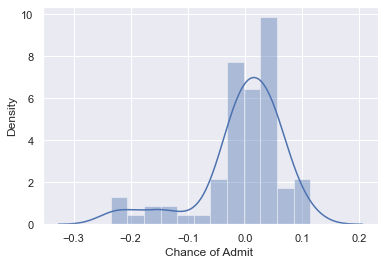

In [47]:
sns.distplot(error)

In [48]:
b = pd.DataFrame(data={'Actual values': y_test, 'Predicted values': y_pred_reg})

In [49]:
b.head()

,Actual values,Predicted values
26,0.76,0.759400
29,0.54,0.487217
92,0.34,0.575175
285,0.93,0.879440
306,0.79,0.820830


## Coefficients of features according to model

In [50]:
coef = pd.DataFrame(data = {'Features': x.columns, 'Coefficient': reg.coef_})
coef

,Features,Coefficient
0,GRE Score,0.002370
1,University Rating,0.004676
2,LOR,0.017045
3,CGPA,0.136098
4,Research,0.027584
